# Imports

In [1]:
import numpy as np
import dask.dataframe as dd
from dask.distributed import Client
client = Client()  # start distributed scheduler locally.  Launch dashboard
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

In [2]:
column_types = {
    'bert': str,
    'hashtags': str,
    'tweet_id': str,
    'media': str,
    'links': str,
    'domains': str,
    'type': str,
    'language': str,
    'timestamp': np.uint32,
    'AUTHOR_user_id': str,
    'AUTHOR_follower_count': np.uint32,
    'AUTHOR_following_count': np.uint32,
    'AUTHOR_verified': bool,
    'AUTHOR_account_creation': np.uint32,
    'INTERACTOR_user_id': str,
    'INTERACTOR_follower_count': np.uint32,
    'INTERACTOR_following_count': np.uint32,
    'INTERACTOR_verified': bool,
    'INTERACTOR_account_creation': np.uint32,
    'AUTHOR_follows_INTERACTOR': bool,
    'reply_timestamp': 'Int32',
    'retweet_timestamp': 'Int32',
    'quote_timestamp': 'Int32',
    'like_timestamp': 'Int32'
}

df = dd.read_csv('sample_validation/part-*',
                 names=list(column_types.keys()),
                 header=0,
                 sep='',
                 dtype=column_types)
df.head()

,bert,hashtags,tweet_id,media,links,domains,type,language,timestamp,AUTHOR_user_id,...,INTERACTOR_user_id,INTERACTOR_follower_count,INTERACTOR_following_count,INTERACTOR_verified,INTERACTOR_account_creation,AUTHOR_follows_INTERACTOR,reply_timestamp,retweet_timestamp,quote_timestamp,like_timestamp
0,101\t27158\t42682\t14444\t188\t16218\t10173\t4...,A338C5C1637BEDA847BC1237241145BC,620B83CB3963A1A24D59AD1CDA2C1E10,NaN,NaN,NaN,TopLevel,B8B04128918BBF54E2E178BFF1ABA833,1614476822,6B1525449DEC20FFB77526D2A86B1563,...,F16C923EEEF0C56FA8E03C9947A70CAB,1316,1261,False,1470337501,True,<NA>,<NA>,<NA>,<NA>
1,101\t56898\t137\t32385\t61620\t12659\t22471\t1...,NaN,5614711FC32B65D6315447666196B362,Video,NaN,NaN,Retweet,E7F038DE3EAD397AEC9193686C911677,1614593752,437B4EF4128B8FE8079BB81A5ACF656C,...,86FADA0FC87B8668B34C4C9EA41EEF54,417,411,False,1576241664,True,<NA>,<NA>,<NA>,<NA>
2,101\t10117\t11424\t25441\t10135\t100\t14120\t1...,NaN,50733D80B3733168FBEBA7B7E6F76328,Photo\tPhoto,NaN,NaN,TopLevel,488B32D24BD4BB44172EB981C1BCA6FA,1614316064,96BD65F70F3659D17C532D17EE89E378,...,CF3CCAA5F335FC784FD5635CF433688C,3,60,False,1602401250,False,<NA>,<NA>,<NA>,1614356568
3,101\t55531\t8641\t6824\t1933\t15802\t14725\t10...,NaN,9AF23572E97D092F188F89B98026F970,NaN,NaN,NaN,TopLevel,E7F038DE3EAD397AEC9193686C911677,1614349500,0076D50D707E65CA929490588036C58A,...,AC30E66EC27F4C07FE1278D6DDC2FBEB,136,211,False,1571210700,True,<NA>,<NA>,<NA>,<NA>
4,101\t14120\t131\t120\t120\t188\t119\t11170\t12...,NaN,B36D41BF88D41BFBE799B25EBF22E434,Photo,NaN,NaN,TopLevel,313ECD3A1E5BB07406E4249475C2D6D6,1614713508,91E0392CF72A3DF6A3647BE7CC19D21A,...,147B32F040009C62E69FDCAF23F9C800,273,416,False,1574020061,False,<NA>,<NA>,<NA>,1614717199


In [3]:
df = df.compute()

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# Data Exploration

## Distribution of the languages

In [6]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = list(languages.index.values)
sizes = list(languages.values)
explode = (0 for i in range(len(languages.index.values)))  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

NameError: name 'languages' is not defined

## Small class problem?

### Reply

In [7]:
negative_reply = df[df['reply_timestamp'].isna()].shape[0]
positive_reply = df[~df['reply_timestamp'].isna()].shape[0]

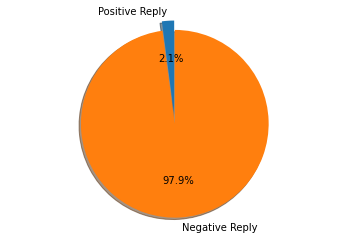

In [8]:

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Positive Reply', 'Negative Reply'
sizes = [positive_reply, negative_reply]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

###  Retweet

In [9]:
negative_retweet = df[df['retweet_timestamp'].isna()].shape[0]
positive_retweet = df[~df['retweet_timestamp'].isna()].shape[0]

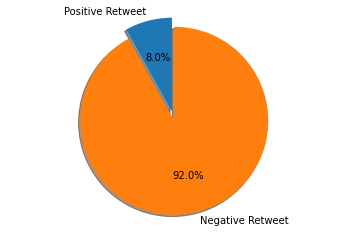

In [10]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Positive Retweet', 'Negative Retweet'
sizes = [positive_retweet, negative_retweet]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Like

In [11]:
negative_like = df[df['like_timestamp'].isna()].shape[0]
positive_like = df[~df['like_timestamp'].isna()].shape[0]

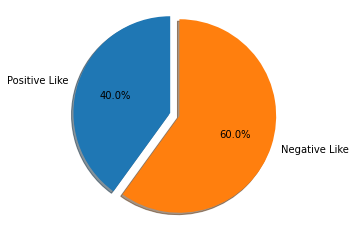

In [12]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Positive Like', 'Negative Like'
sizes = [positive_like, negative_like]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Retweet + Comment (Quote)

In [13]:
negative_retweet_comment = df[df['quote_timestamp'].isna()].shape[0]
positive_retweet_comment = df[~df['quote_timestamp'].isna()].shape[0]

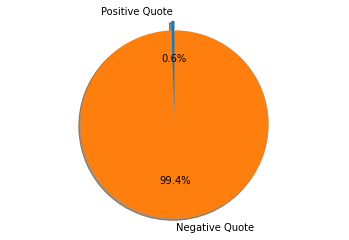

In [14]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Positive Quote', 'Negative Quote'
sizes = [positive_retweet_comment, negative_retweet_comment]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Distribution along the day of the week

In [15]:
import pandas as pd
from datetime import datetime
from tqdm import tqdm

week_days = {
    0: "monday",
    1: "tuesday",
    2: "wednesday",
    3: "thursday",
    4: "friday",
    5: "saturday",
    6: "sunday"
}

def create_datetime(df):
    tqdm.pandas()
    df["datetime_tweet_creation"] = df["timestamp"].progress_apply(lambda x: pd.to_datetime(x, unit='s'))
    df["weekday_tweet_creation"] = df["datetime_tweet_creation"].progress_apply(lambda x: x.weekday())
    return df

In [16]:
df = create_datetime(df)

100%|██████████████████████████████████████████████████████████████████| 14271143/14271143 [00:52<00:00, 270763.51it/s]


In [17]:
day_grouped = df.groupby("weekday_tweet_creation").count()

In [18]:
day_grouped

,bert,hashtags,tweet_id,media,links,domains,type,language,timestamp,AUTHOR_user_id,...,INTERACTOR_follower_count,INTERACTOR_following_count,INTERACTOR_verified,INTERACTOR_account_creation,AUTHOR_follows_INTERACTOR,reply_timestamp,retweet_timestamp,quote_timestamp,like_timestamp,datetime_tweet_creation
weekday_tweet_creation,,,,,,,,,,,,,,,,,,,,,
0,1921769,416853,1921769,747734,254648,254648,1921769,1921769,1921769,1921769,...,1921769,1921769,1921769,1921769,1921769,40001,153710,10590,786556,1921769
1,2020795,423883,2020795,777416,266674,266674,2020795,2020795,2020795,2020795,...,2020795,2020795,2020795,2020795,2020795,43230,159380,11463,817329,2020795
2,2022229,439652,2022229,736613,267677,267677,2022229,2022229,2022229,2022229,...,2022229,2022229,2022229,2022229,2022229,40374,152430,10664,748572,2022229
3,2098821,445180,2098821,808819,283204,283204,2098821,2098821,2098821,2098821,...,2098821,2098821,2098821,2098821,2098821,44025,172178,12128,826397,2098821
4,2075027,453956,2075027,785339,288334,288334,2075027,2075027,2075027,2075027,...,2075027,2075027,2075027,2075027,2075027,44017,165745,11686,821763,2075027
5,2059422,434456,2059422,761132,231492,231492,2059422,2059422,2059422,2059422,...,2059422,2059422,2059422,2059422,2059422,44378,178351,11051,839304,2059422
6,2073080,471155,2073080,859845,228142,228142,2073080,2073080,2073080,2073080,...,2073080,2073080,2073080,2073080,2073080,42642,166930,11223,871817,2073080


<BarContainer object of 7 artists>

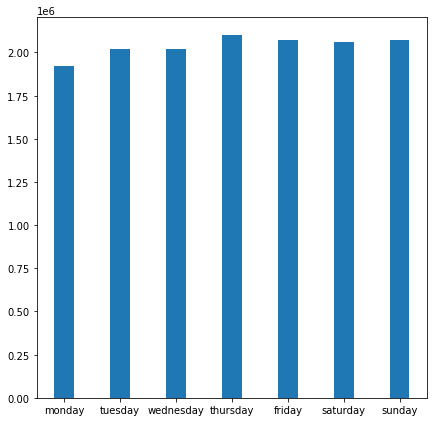

In [19]:
plt.figure(figsize=(7, 7))
plt.bar([week_days[idx] for idx in day_grouped.index], day_grouped["tweet_id"].values, width=0.35)

### Like

In [20]:
positive_like_weekday = df[~df['like_timestamp'].isna()].groupby("weekday_tweet_creation").count()
negative_like_weekday = df[df['like_timestamp'].isna()].groupby("weekday_tweet_creation").count()

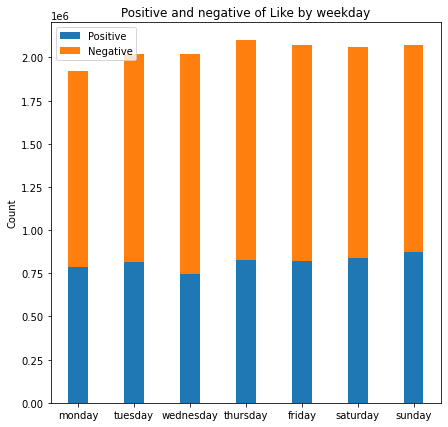

In [21]:
labels = [week_days[idx] for idx in day_grouped.index]

positive = positive_like_weekday["tweet_id"].values
negative = negative_like_weekday["tweet_id"].values
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

fig.set_figheight(7)
fig.set_figwidth(7)

ax.bar(labels, positive, width, label='Positive')
ax.bar(labels, negative, width, bottom=positive,
       label='Negative')

ax.set_ylabel('Count')
ax.set_title('Positive and negative of Like by weekday')
ax.legend()

plt.show()

### Reply

In [22]:
positive_reply_weekday = df[~df['reply_timestamp'].isna()].groupby("weekday_tweet_creation").count()
negative_reply_weekday = df[df['reply_timestamp'].isna()].groupby("weekday_tweet_creation").count()

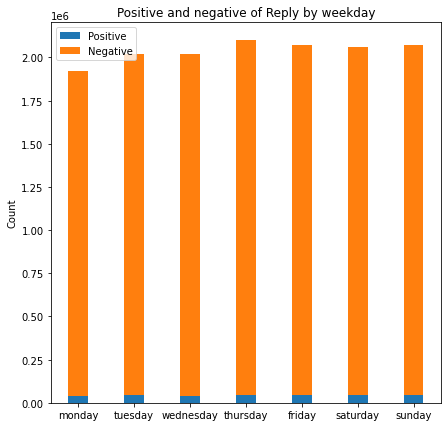

In [23]:
labels = [week_days[idx] for idx in day_grouped.index]
positive = positive_reply_weekday["tweet_id"].values
negative = negative_reply_weekday["tweet_id"].values
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

fig.set_figheight(7)
fig.set_figwidth(7)

ax.bar(labels, positive, width, label='Positive')
ax.bar(labels, negative, width, bottom=positive,
       label='Negative')

ax.set_ylabel('Count')
ax.set_title('Positive and negative of Reply by weekday')
ax.legend()

plt.show()

### Retweet

In [24]:
positive_retweet_weekday = df[~df['retweet_timestamp'].isna()].groupby("weekday_tweet_creation").count()
negative_retweet_weekday = df[df['retweet_timestamp'].isna()].groupby("weekday_tweet_creation").count()

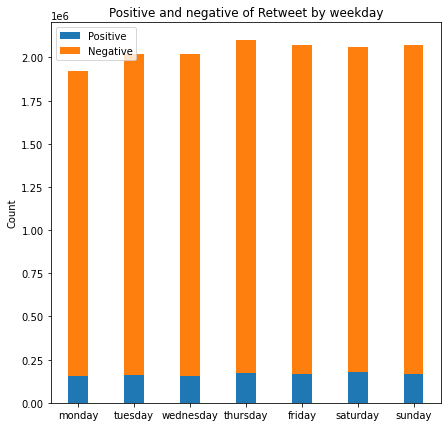

In [25]:
labels = [week_days[idx] for idx in day_grouped.index]
positive = positive_retweet_weekday["tweet_id"].values
negative = negative_retweet_weekday["tweet_id"].values
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()


fig.set_figheight(7)
fig.set_figwidth(7)

ax.bar(labels, positive, width, label='Positive')
ax.bar(labels, negative, width, bottom=positive,
       label='Negative')

ax.set_ylabel('Count')
ax.set_title('Positive and negative of Retweet by weekday')
ax.legend()

plt.show()

### Quote

In [26]:
positive_retweet_comment_weekday = df[~df['quote_timestamp'].isna()].groupby("weekday_tweet_creation").count()
negative_retweet_comment_weekday = df[df['quote_timestamp'].isna()].groupby("weekday_tweet_creation").count()

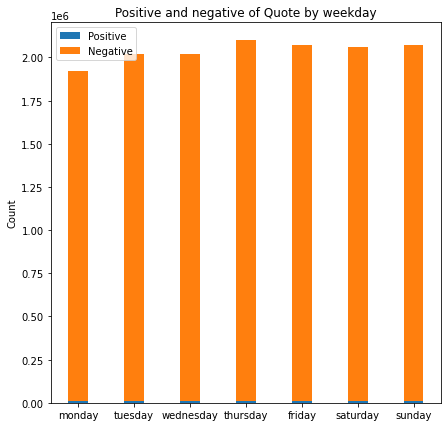

In [27]:
labels = [week_days[idx] for idx in day_grouped.index]
positive = positive_retweet_comment_weekday["tweet_id"].values
negative = negative_retweet_comment_weekday["tweet_id"].values
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()


fig.set_figheight(7)
fig.set_figwidth(7)

ax.bar(labels, positive, width, label='Positive')
ax.bar(labels, negative, width, bottom=positive,
       label='Negative')

ax.set_ylabel('Count')
ax.set_title('Positive and negative of Quote by weekday')
ax.legend()

plt.show()

## Histogram of Author users

In [28]:
!pip install seaborn

C:\Users\adryt\anaconda3\envs\TFM\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AUTHOR_follower_count', ylabel='Density'>

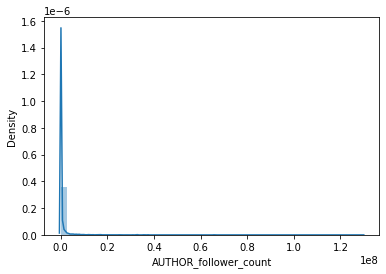

In [29]:
import seaborn as sns
sns.distplot(df["AUTHOR_follower_count"])

(array([1.4040864e+07, 1.1878300e+05, 5.7174000e+04, 1.8269000e+04,
        1.5080000e+04, 7.6900000e+03, 6.7450000e+03, 2.0960000e+03,
        2.8250000e+03, 1.6170000e+03]),
 array([1.00000000e+00, 1.29448467e+07, 2.58896924e+07, 3.88345381e+07,
        5.17793838e+07, 6.47242295e+07, 7.76690752e+07, 9.06139209e+07,
        1.03558767e+08, 1.16503612e+08, 1.29448458e+08]),
 <BarContainer object of 10 artists>)

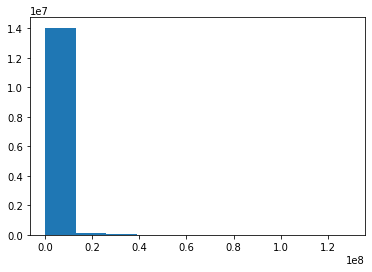

In [30]:
plt.hist(df["AUTHOR_follower_count"])

(array([1.4255009e+07, 1.0529000e+04, 3.7660000e+03, 1.0800000e+03,
        5.2200000e+02, 1.3600000e+02, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0100000e+02]),
 array([      0. ,  425325.9,  850651.8, 1275977.7, 1701303.6, 2126629.5,
        2551955.4, 2977281.3, 3402607.2, 3827933.1, 4253259. ]),
 <BarContainer object of 10 artists>)

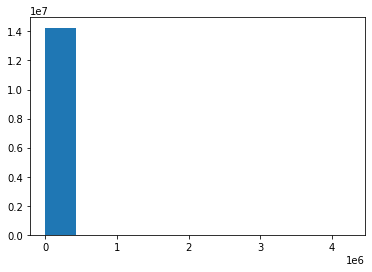

In [31]:
plt.hist(df["AUTHOR_following_count"])

(array([1.4270958e+07, 1.0700000e+02, 4.9000000e+01, 1.7000000e+01,
        8.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 2.0000000e+00]),
 array([       0. ,  1829092.3,  3658184.6,  5487276.9,  7316369.2,
         9145461.5, 10974553.8, 12803646.1, 14632738.4, 16461830.7,
        18290923. ]),
 <BarContainer object of 10 artists>)

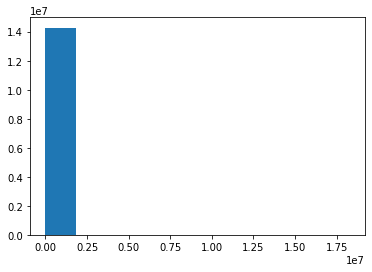

In [32]:
plt.hist(df["INTERACTOR_follower_count"])

(array([1.4270988e+07, 1.0400000e+02, 3.4000000e+01, 3.0000000e+00,
        4.0000000e+00, 4.0000000e+00, 5.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]),
 array([1.0000000e+00, 1.6047870e+05, 3.2095640e+05, 4.8143410e+05,
        6.4191180e+05, 8.0238950e+05, 9.6286720e+05, 1.1233449e+06,
        1.2838226e+06, 1.4443003e+06, 1.6047780e+06]),
 <BarContainer object of 10 artists>)

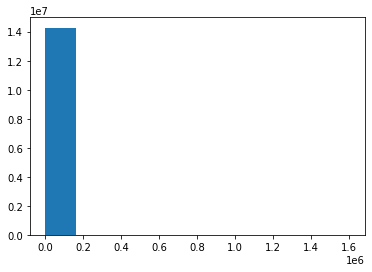

In [33]:
plt.hist(df["INTERACTOR_following_count"])